In [1]:
#
import sys
import os
sys.path.append('/home/mt/Dropbox/xas-database/code')

import t4iss
from t4iss.core import *
from copy import deepcopy

import numpy as np
import pickle
from glob import glob
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.chemenv.coordination_environments.coordination_geometry_finder import LocalGeometryFinder
from pymatgen.analysis.chemenv.coordination_environments.chemenv_strategies import MultiWeightsChemenvStrategy
from pymatgen.analysis.chemenv.coordination_environments.structure_environments import LightStructureEnvironments
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

from sklearn.cluster import DBSCAN
from matplotlib.gridspec import GridSpec
from scipy.stats import pearsonr, spearmanr

lgf = LocalGeometryFinder()
strategy = MultiWeightsChemenvStrategy.stats_article_weights_parameters()

def getKey(item): return item[2]


from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr,spearmanr,kendalltau 
from scipy.optimize import nnls


Imported t4iss with defaults:

- t4iss_xanes_data : /home/mt/.t4iss/xanes_data
- t4iss_scratch : /home/mt/.t4iss/scratch
- mcr_path : /home/mt/Dropbox/xas-database/code/t4iss/mcr
- scripts_path : /home/mt/Dropbox/xas-database/code/t4iss/scripts
- octave_path : /usr/bin/octave
- matlab_path : None

If you use the ChemEnv tool for your research, please consider citing the following reference(s) :
David Waroquiers, Xavier Gonze, Gian-Marco Rignanese, Cathrin Welker-Nieuwoudt, Frank Rosowski,
Michael Goebel, Stephan Schenk, Peter Degelmann, Rute Andre, Robert Glaum, and Geoffroy Hautier,
"Statistical analysis of coordination environments in oxides",
Chem. Mater., 2017, 29 (19), pp 8346–8360,
DOI: 10.1021/acs.chemmater.7b02766



In [2]:
# inputs 
# def get_averaged(struct):
#     s = []
#     for i in struct[1]:
#         epath = os.path.join("MP_structures", struct[0], "exciting_%03d_Ti-K"%(i), "xanes.pkl") 
#         spec = pickle.load(open(epath,'rb')); s.append(spec)

#     for i in s:
#         i.broaden0(l_gamma=0.89,lvl=[0.1,0.1,spec.Eonset+15])
#         i.transform(irange=[-5,65], x0shift=True, normalize='max') 

#     t = s[0].E*0
#     for i in s:
#         t = t + i.I

#     a = t / len(s); a = a / max(a)
    
#     return [s[0].E,a]


# basis_set = []
# set_c4 = []

# # 4a
# [a,s] = read_xanes('MT_structures/mt-050618-1Ti-inQuartz',absorption_specie='Ti',order='e',
#                    skip_missing=False,symprec=0.01,ang_tol=5)
# a.broaden0(l_gamma=0.89,lvl=[0.1,0.1,a.Eonset+15])
# a.transform(irange=[-5,65], x0shift=True, normalize='max') 
# set_c4.append([a.E,a.I])
# basis_set.append(mXANES(data=[a.E,a.I],Eonset=0))

# # 4b
# [a1,s] = read_xanes('MP_structures/mp-553432',absorption_specie='Ti',order='e',
#                    skip_missing=False,symprec=0.01,ang_tol=5)
# a1.broaden0(l_gamma=0.89,lvl=[0.1,0.1,a1.Eonset+15])
# a1.transform(irange=[-5,65], x0shift=True, normalize='max') 
# [a2,s] = read_xanes('MP_structures/mp-777129',absorption_specie='Ti',order='e',
#                    skip_missing=False,symprec=0.01,ang_tol=5)
# a2.broaden0(l_gamma=0.89,lvl=[0.1,0.1,a2.Eonset+15])
# a2.transform(irange=[-5,65], x0shift=True, normalize='max') 
# set_c4.append([a1.E,(a1.I+a2.I)/2])
# basis_set.append(mXANES(data=[a1.E,(a1.I+a2.I)/2],Eonset=0))
# # 4c
# [a,s] = read_xanes('MP_structures/mp-656850',absorption_specie='Ti',order='e',
#                    skip_missing=False,symprec=0.01,ang_tol=5)
# a.broaden0(l_gamma=0.89,lvl=[0.1,0.1,a.Eonset+15])
# a.transform(irange=[-5,65], x0shift=True, normalize='max') 
# set_c4.append([a.E,a.I])
# basis_set.append(mXANES(data=[a.E,a.I],Eonset=0))

# # 4d
# struct = ['mvc-4715',[4,7,14,16]]
# [e,a1] = get_averaged(struct)
# struct = ['mvc-5171',[12]]
# [e,a2] = get_averaged(struct)
# struct = ['mvc-9726',[7,12]]
# [e,a3] = get_averaged(struct)
# struct = ['mvc-11115',[1]]
# [e,a4] = get_averaged(struct)
# set_c4.append([e,(a1+a2+a3+a4)/4])
# basis_set.append(mXANES(data=[e,(a1+a2+a3+a4)/4],Eonset=0))




# set_c5 = []

# # 5a
# struct = ['mvc-379',[5]]
# [e,a] = get_averaged(struct)
# set_c5.append([e,a])
# basis_set.append(mXANES(data=[e,a],Eonset=0))

# # 5b
# struct = ['mp-1203',[6]]
# [e,a] = get_averaged(struct)
# set_c5.append([e,a])
# basis_set.append(mXANES(data=[e,a],Eonset=0))

# # 5c
# struct = ['mp-572822',[2]]
# [e,a] = get_averaged(struct)
# set_c5.append([e,a])
# basis_set.append(mXANES(data=[e,a],Eonset=0))

# # 5d
# struct = ['mp-754672',[1]]
# [e,a] = get_averaged(struct)
# set_c5.append([e,a])
# basis_set.append(mXANES(data=[e,a],Eonset=0))





# set_c6 = []

# # 6a
# [a,s] = read_xanes('MP_structures/mp-2657',absorption_specie='Ti',order='e',
#                    skip_missing=False,symprec=0.01,ang_tol=5)
# a.broaden0(l_gamma=0.89,lvl=[0.1,0.1,a.Eonset+15])
# a.transform(irange=[-5,65], x0shift=True, normalize='max') 
# set_c6.append([a.E,a.I])
# basis_set.append(mXANES(data=[a.E,a.I],Eonset=0))

# # 6b
# [a,s] = read_xanes('MP_structures/mp-390',absorption_specie='Ti',order='e',
#                    skip_missing=False,symprec=0.01,ang_tol=5)
# a.broaden0(l_gamma=0.89,lvl=[0.1,0.1,a.Eonset+15])
# a.transform(irange=[-5,65], x0shift=True, normalize='max') 
# set_c6.append([a.E,a.I])
# basis_set.append(mXANES(data=[a.E,a.I],Eonset=0))

# # 6c
# [a,s] = read_xanes('MP_structures/mp-1439',absorption_specie='Ti',order='e',
#                    skip_missing=False,symprec=0.01,ang_tol=5)
# a.broaden0(l_gamma=0.89,lvl=[0.1,0.1,a.Eonset+15])
# a.transform(irange=[-5,65], x0shift=True, normalize='max') 
# set_c6.append([a.E,a.I])
# basis_set.append(mXANES(data=[a.E,a.I],Eonset=0))

# # 6d
# [a,s] = read_xanes('MP_structures/mp-1840',absorption_specie='Ti',order='e',
#                    skip_missing=False,symprec=0.01,ang_tol=5)
# a.broaden0(l_gamma=0.89,lvl=[0.1,0.1,a.Eonset+15])
# a.transform(irange=[-5,65], x0shift=True, normalize='max') 
# set_c6.append([a.E,a.I])
# basis_set.append(mXANES(data=[a.E,a.I],Eonset=0))

# # 6e
# [a,s] = read_xanes('MP_structures/mp-9173',absorption_specie='Ti',order='e',
#                    skip_missing=False,symprec=0.01,ang_tol=5)
# a.broaden0(l_gamma=0.89,lvl=[0.1,0.1,a.Eonset+15])
# a.transform(irange=[-5,65], x0shift=True, normalize='max') 
# set_c6.append([a.E,a.I])
# basis_set.append(mXANES(data=[a.E,a.I],Eonset=0))

# # 6f
# [a,s] = read_xanes('MP_structures/mp-430',absorption_specie='Ti',order='e',
#                    skip_missing=False,symprec=0.01,ang_tol=5)
# a.broaden0(l_gamma=0.89,lvl=[0.1,0.1,a.Eonset+15])
# a.transform(irange=[-5,65], x0shift=True, normalize='max') 
# set_c6.append([a.E,a.I])
# basis_set.append(mXANES(data=[a.E,a.I],Eonset=0))


# pickle.dump(basis_set,open('spectra.pkl','wb'))
# basis_set = pickle.load(open('spectra.pkl','rb'))






# R_exp = mXANES(data_loadfrom='exp/rutile/NSLS-II_2017.dat',  xanesid='Rutile',  Eonset=4961 ) 
# A_exp = mXANES(data_loadfrom='exp/anatase/NSLS-II_2017.dat',  xanesid='Anatase',  Eonset=4961 ) 
# R_exp.transform(irange=[-5,65],x0shift=True,y0shift=True,normalize='max',std=False)
# A_exp.transform(irange=[-5,65],x0shift=True,y0shift=True,normalize='max',std=False,xshift=0)

# # plot all spectra
# plt.rcParams.update({'font.size': 16})

# fig = plt.figure(figsize=(18,12))

# ax = fig.add_subplot('131')
# shift = 0
# for i in basis_set[0:4]:
#     ax.plot(i.E0, shift+i.I0, lw=2, alpha=0.8)  
#     shift += 0.3

# ax.set_yticks(());
# ax.set_title('4-coordinated');

# ax = fig.add_subplot('132')
# shift = 0
# for i in basis_set[4:8]:
#     ax.plot(i.E0, shift+i.I0, lw=2, alpha=0.8) 
#     shift += 0.3

# ax.set_yticks(());
# ax.set_title('5-coordinated');

# ax = fig.add_subplot('133')
# ax.plot(R_exp.E, R_exp.I, '--k', lw=2, alpha=0.8) 
# ax.plot(A_exp.E, 0.3+A_exp.I, '--k', lw=2, alpha=0.8) 
# shift = 0
# for i in basis_set[8:]:
#     ax.plot(i.E0, shift+i.I0, lw=2, alpha=0.8) 
#     shift += 0.3

# ax.set_yticks(());
# ax.set_title('6-coordinated');


# plt.tight_layout()

In [8]:
# optimizer 
def optimizer(unknown,basis_set,rshifts,emax=50,prefix=None,suffix=None,verbose=False):

    scores_mae = []
    scores_mse = []
    scores_pea = []
    scores_spm = []

    fits = []
    outs = []
    rshifts_all = []
    shifts = []


    for rshift in rshifts[0]:

        if verbose:
            print('Doing rshift: %3.2f'%rshift)
        
        ishifts = []
        
        for i in range(14):
            if basis_set[i][3][2] < 1 or basis_set[i][2] == 0: ishifts.append([rshift]); 
            else: ishifts.append(np.linspace(rshift+basis_set[i][3][0],rshift+basis_set[i][3][1],num=basis_set[i][3][2]))
           

        for s1 in ishifts[0]:
            for s2 in ishifts[1]:      
                for s3 in ishifts[2]:
                    for s4 in ishifts[3]:
                        for s5 in ishifts[4]:                
                            for s6 in ishifts[5]:
                                for s7 in ishifts[6]:
                                    for s8 in ishifts[7]:
                                        for s9 in ishifts[8]:      
                                            for s10 in ishifts[9]:
                                                for s11 in ishifts[10]:
                                                    for s12 in ishifts[11]:                
                                                        for s13 in ishifts[12]:
                                                            for s14 in ishifts[13]: 

                                                                basis_set[0][0].transform(irange=[0,emax],x0shift=True,y0shift=True,normalize='max',xshift=s1)
                                                                basis_set[1][0].transform(irange=[0,emax],x0shift=True,y0shift=True,normalize='max',xshift=s2)
                                                                basis_set[2][0].transform(irange=[0,emax],x0shift=True,y0shift=True,normalize='max',xshift=s3)
                                                                basis_set[3][0].transform(irange=[0,emax],x0shift=True,y0shift=True,normalize='max',xshift=s4)
                                                                basis_set[4][0].transform(irange=[0,emax],x0shift=True,y0shift=True,normalize='max',xshift=s5)
                                                                basis_set[5][0].transform(irange=[0,emax],x0shift=True,y0shift=True,normalize='max',xshift=s6)
                                                                basis_set[6][0].transform(irange=[0,emax],x0shift=True,y0shift=True,normalize='max',xshift=s7)
                                                                basis_set[7][0].transform(irange=[0,emax],x0shift=True,y0shift=True,normalize='max',xshift=s8)
                                                                basis_set[8][0].transform(irange=[0,emax],x0shift=True,y0shift=True,normalize='max',xshift=s9)
                                                                basis_set[9][0].transform(irange=[0,emax],x0shift=True,y0shift=True,normalize='max',xshift=s10)
                                                                basis_set[10][0].transform(irange=[0,emax],x0shift=True,y0shift=True,normalize='max',xshift=s11)
                                                                basis_set[11][0].transform(irange=[0,emax],x0shift=True,y0shift=True,normalize='max',xshift=s12)
                                                                basis_set[12][0].transform(irange=[0,emax],x0shift=True,y0shift=True,normalize='max',xshift=s13)
                                                                basis_set[13][0].transform(irange=[0,emax],x0shift=True,y0shift=True,normalize='max',xshift=s14)                                                                
                                                                
                                                                A = np.row_stack((basis_set[0][0].I*basis_set[0][2],
                                                                                  basis_set[1][0].I*basis_set[1][2],
                                                                                  basis_set[2][0].I*basis_set[2][2],
                                                                                  basis_set[3][0].I*basis_set[3][2],
                                                                                  basis_set[4][0].I*basis_set[4][2],
                                                                                  basis_set[5][0].I*basis_set[5][2],
                                                                                  basis_set[6][0].I*basis_set[6][2],
                                                                                  basis_set[7][0].I*basis_set[7][2],
                                                                                  basis_set[8][0].I*basis_set[8][2],
                                                                                  basis_set[9][0].I*basis_set[9][2],
                                                                                  basis_set[10][0].I*basis_set[10][2],                                                                                 
                                                                                  basis_set[11][0].I*basis_set[11][2],
                                                                                  basis_set[12][0].I*basis_set[12][2],
                                                                                  basis_set[13][0].I*basis_set[13][2]))
                                                                b = unknown.I
                                                                out = nnls(A.T,b)

                                                                fit = np.dot(out[0],A); fit = fit / max(fit)

                                                                score_mae = -mean_squared_error(unknown.I,fit)   
                                                                score_mse = -mean_absolute_error(unknown.I,fit) 
                                                                score_pea = pearsonr(unknown.I,fit)[0]
                                                                score_spm = spearmanr(unknown.I,fit)[0]

                                                                scores_mae.append(score_mae); scores_mse.append(score_mse); scores_pea.append(score_pea); scores_spm.append(score_spm)            
                                                                shifts.append([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14])  
                                                                rshifts_all.append(rshift)


    imax_mae = np.argmax(scores_mae); shifts_mae = shifts[imax_mae]
    imax_mse = np.argmax(scores_mse); shifts_mse = shifts[imax_mse]
    imax_pea = np.argmax(scores_pea); shifts_pea = shifts[imax_pea]
    imax_spm = np.argmax(scores_spm); shifts_spm = shifts[imax_spm]
    
    print('optimum rshift from mae is %3.2f'%rshifts_all[imax_mae])
    print('optimum rshift from mse is %3.2f'%rshifts_all[imax_mse])
    print('optimum rshift from pea is %3.2f'%rshifts_all[imax_pea])
    print('optimum rshift from spm is %3.2f'%rshifts_all[imax_spm])    
    
    if prefix is None:
        prefix='optim_14'
    if suffix is None:
        suffix=''
    pname = prefix+'.'+'emax%d'%(emax)+'.'+suffix+'.pkl'  
 
    pickle.dump([basis_set,emax,shifts_mae,shifts_mse,shifts_pea,shifts_spm],open(pname,'wb'))
    
    return

In [11]:
# plotter 
def plotter(unknown,emax=50,prefix='full',suffix='coarse',emax_plt=50,normalize_fit=True,pdfexport=False):
    
    pname = prefix+'.'+'emax%d'%(emax)+'.'+suffix+'.pkl'
    [basis_set,emax_opt,shifts_mae,shifts_mse,shifts_pea,shifts_spm] = pickle.load(open(pname,'rb'))

    fig = plt.figure(figsize=(20,10))

    shifts = shifts_mae
    ax = fig.add_subplot('141')

    # get out from optimization
    unknown.transform(irange=[0,emax_opt],x0shift=True,y0shift=True,normalize='max',std=False,xshift=0)

    for i in range(14):
        basis_set[i][0].transform(irange=[0,emax_opt],x0shift=True,y0shift=True,normalize='max',xshift=shifts[i])

    A = np.row_stack((basis_set[0][0].I*basis_set[0][2],basis_set[1][0].I*basis_set[1][2],basis_set[2][0].I*basis_set[2][2],basis_set[3][0].I*basis_set[3][2],basis_set[4][0].I*basis_set[4][2],
                      basis_set[5][0].I*basis_set[5][2],basis_set[6][0].I*basis_set[6][2],basis_set[7][0].I*basis_set[7][2],basis_set[8][0].I*basis_set[8][2],basis_set[9][0].I*basis_set[9][2],
                      basis_set[10][0].I*basis_set[10][2],basis_set[11][0].I*basis_set[11][2],basis_set[12][0].I*basis_set[12][2],basis_set[13][0].I*basis_set[13][2]))
    b = unknown.I
    out = nnls(A.T,b)

    unknown.transform(irange=[0,emax_plt],x0shift=True,y0shift=True,normalize='max',std=False,xshift=0)
    for i in range(14):
        basis_set[i][0].transform(irange=[0,emax_plt],x0shift=True,y0shift=True,normalize='max',xshift=shifts[i])
    A = np.row_stack((basis_set[0][0].I*basis_set[0][2],basis_set[1][0].I*basis_set[1][2],basis_set[2][0].I*basis_set[2][2],basis_set[3][0].I*basis_set[3][2],basis_set[4][0].I*basis_set[4][2],
                      basis_set[5][0].I*basis_set[5][2],basis_set[6][0].I*basis_set[6][2],basis_set[7][0].I*basis_set[7][2],basis_set[8][0].I*basis_set[8][2],basis_set[9][0].I*basis_set[9][2],
                      basis_set[10][0].I*basis_set[10][2],basis_set[11][0].I*basis_set[11][2],basis_set[12][0].I*basis_set[12][2],basis_set[13][0].I*basis_set[13][2]))

    fit = np.dot(out[0],A); score_mae = mean_absolute_error(unknown.I,fit)
    if normalize_fit:
        fit = fit / max(fit) 
    fit_new = mXANES(data=[unknown.E,fit])
    fit_new.transform(irange=[0,emax_plt+10])
    fit_broad = mXANES(data=[fit_new.E,fit_new.I])
    fit_broad.broaden0(lvl=[0.1,0.1,fit_broad.Eonset+15])
    fit_broad.transform(irange=[0,emax_plt],x0shift=True,y0shift=True,normalize='max')

    ax.plot(unknown.E,0.1+unknown.I, '-k', lw=2, alpha=0.8, label='Unknown')  
    ax.plot(unknown.E,0.1+fit, '--r', lw=2, alpha=0.8, label='fit');
    ax.plot(fit_broad.E,0.1+fit_broad.I, ':b', lw=2, alpha=0.8, label='fit_broad');  

    yshift = 0
    for i in range(14):
        ax.plot(unknown.E,yshift+0.3*basis_set[i][0].I, lw=4, alpha=out[0][i], label='(%3.2f) '%out[0][i]+basis_set[i][1]);
        yshift -= 0.03
    
    ax.plot([emax_opt,emax_opt],[-0.72,1.42],':k',lw=1)

    ax.legend(loc='best',fontsize=12,ncol=1); ax.set_yticks([]); ax.set_ylim([-0.41,1.22])
    ax.set_title('metric=MAE (%7.4f)'%score_mae,fontsize=20)


    
    
    
    shifts = shifts_mse
    ax = fig.add_subplot('142')

    # get out from optimization
    unknown.transform(irange=[0,emax_opt],x0shift=True,y0shift=True,normalize='max',std=False,xshift=0)

    for i in range(14):
        basis_set[i][0].transform(irange=[0,emax_opt],x0shift=True,y0shift=True,normalize='max',xshift=shifts[i])

    A = np.row_stack((basis_set[0][0].I*basis_set[0][2],basis_set[1][0].I*basis_set[1][2],basis_set[2][0].I*basis_set[2][2],basis_set[3][0].I*basis_set[3][2],basis_set[4][0].I*basis_set[4][2],
                      basis_set[5][0].I*basis_set[5][2],basis_set[6][0].I*basis_set[6][2],basis_set[7][0].I*basis_set[7][2],basis_set[8][0].I*basis_set[8][2],basis_set[9][0].I*basis_set[9][2],
                      basis_set[10][0].I*basis_set[10][2],basis_set[11][0].I*basis_set[11][2],basis_set[12][0].I*basis_set[12][2],basis_set[13][0].I*basis_set[13][2]))
    b = unknown.I
    out = nnls(A.T,b)

    unknown.transform(irange=[0,emax_plt],x0shift=True,y0shift=True,normalize='max',std=False,xshift=0)
    for i in range(14):
        basis_set[i][0].transform(irange=[0,emax_plt],x0shift=True,y0shift=True,normalize='max',xshift=shifts[i])
    A = np.row_stack((basis_set[0][0].I*basis_set[0][2],basis_set[1][0].I*basis_set[1][2],basis_set[2][0].I*basis_set[2][2],basis_set[3][0].I*basis_set[3][2],basis_set[4][0].I*basis_set[4][2],
                      basis_set[5][0].I*basis_set[5][2],basis_set[6][0].I*basis_set[6][2],basis_set[7][0].I*basis_set[7][2],basis_set[8][0].I*basis_set[8][2],basis_set[9][0].I*basis_set[9][2],
                      basis_set[10][0].I*basis_set[10][2],basis_set[11][0].I*basis_set[11][2],basis_set[12][0].I*basis_set[12][2],basis_set[13][0].I*basis_set[13][2]))

    fit = np.dot(out[0],A); score_mse = mean_squared_error(unknown.I,fit)
    if normalize_fit:
        fit = fit / max(fit) 
    fit_new = mXANES(data=[unknown.E,fit])
    fit_new.transform(irange=[0,emax_plt+10])
    fit_broad = mXANES(data=[fit_new.E,fit_new.I])
    fit_broad.broaden0(lvl=[0.1,0.1,fit_broad.Eonset+15])
    fit_broad.transform(irange=[0,emax_plt],x0shift=True,y0shift=True,normalize='max')

    ax.plot(unknown.E,0.1+unknown.I, '-k', lw=2, alpha=0.8, label='Unknown')  
    ax.plot(unknown.E,0.1+fit, '--r', lw=2, alpha=0.8, label='fit');
    ax.plot(fit_broad.E,0.1+fit_broad.I, ':b', lw=2, alpha=0.8, label='fit_broad');  

    yshift = 0
    for i in range(14):
        ax.plot(unknown.E,yshift+0.3*basis_set[i][0].I, lw=4, alpha=out[0][i], label='(%3.2f) '%out[0][i]+basis_set[i][1]);
        yshift -= 0.03
    
    ax.plot([emax_opt,emax_opt],[-0.72,1.42],':k',lw=1)

    ax.legend(loc='best',fontsize=12,ncol=1); ax.set_yticks([]); ax.set_ylim([-0.41,1.22])
    ax.set_title('metric=MSE (%7.4f)'%score_mse,fontsize=20)


    
    
    
    shifts = shifts_pea
    ax = fig.add_subplot('143')

    # get out from optimization
    unknown.transform(irange=[0,emax_opt],x0shift=True,y0shift=True,normalize='max',std=False,xshift=0)

    for i in range(14):
        basis_set[i][0].transform(irange=[0,emax_opt],x0shift=True,y0shift=True,normalize='max',xshift=shifts[i])

    A = np.row_stack((basis_set[0][0].I*basis_set[0][2],basis_set[1][0].I*basis_set[1][2],basis_set[2][0].I*basis_set[2][2],basis_set[3][0].I*basis_set[3][2],basis_set[4][0].I*basis_set[4][2],
                      basis_set[5][0].I*basis_set[5][2],basis_set[6][0].I*basis_set[6][2],basis_set[7][0].I*basis_set[7][2],basis_set[8][0].I*basis_set[8][2],basis_set[9][0].I*basis_set[9][2],
                      basis_set[10][0].I*basis_set[10][2],basis_set[11][0].I*basis_set[11][2],basis_set[12][0].I*basis_set[12][2],basis_set[13][0].I*basis_set[13][2]))
    b = unknown.I
    out = nnls(A.T,b)

    unknown.transform(irange=[0,emax_plt],x0shift=True,y0shift=True,normalize='max',std=False,xshift=0)
    for i in range(14):
        basis_set[i][0].transform(irange=[0,emax_plt],x0shift=True,y0shift=True,normalize='max',xshift=shifts[i])
    A = np.row_stack((basis_set[0][0].I*basis_set[0][2],basis_set[1][0].I*basis_set[1][2],basis_set[2][0].I*basis_set[2][2],basis_set[3][0].I*basis_set[3][2],basis_set[4][0].I*basis_set[4][2],
                      basis_set[5][0].I*basis_set[5][2],basis_set[6][0].I*basis_set[6][2],basis_set[7][0].I*basis_set[7][2],basis_set[8][0].I*basis_set[8][2],basis_set[9][0].I*basis_set[9][2],
                      basis_set[10][0].I*basis_set[10][2],basis_set[11][0].I*basis_set[11][2],basis_set[12][0].I*basis_set[12][2],basis_set[13][0].I*basis_set[13][2]))

    fit = np.dot(out[0],A); score_pea = pearsonr(unknown.I,fit)[0]
    if normalize_fit:
        fit = fit / max(fit)  
    fit_new = mXANES(data=[unknown.E,fit])
    fit_new.transform(irange=[0,emax_plt+10])
    fit_broad = mXANES(data=[fit_new.E,fit_new.I])
    fit_broad.broaden0(lvl=[0.1,0.1,fit_broad.Eonset+15])
    fit_broad.transform(irange=[0,emax_plt],x0shift=True,y0shift=True,normalize='max')

    ax.plot(unknown.E,0.1+unknown.I, '-k', lw=2, alpha=0.8, label='Unknown')  
    ax.plot(unknown.E,0.1+fit, '--r', lw=2, alpha=0.8, label='fit');
    ax.plot(fit_broad.E,0.1+fit_broad.I, ':b', lw=2, alpha=0.8, label='fit_broad');  

    yshift = 0
    for i in range(14):
        ax.plot(unknown.E,yshift+0.3*basis_set[i][0].I, lw=4, alpha=out[0][i], label='(%3.2f) '%out[0][i]+basis_set[i][1]);
        yshift -= 0.03
    
    ax.plot([emax_opt,emax_opt],[-0.72,1.42],':k',lw=1)

    ax.legend(loc='best',fontsize=12,ncol=1); ax.set_yticks([]); ax.set_ylim([-0.41,1.22])
    ax.set_title('metric=Pearson (%5.3f)'%score_pea,fontsize=20) 


    
    
    
    shifts = shifts_spm
    ax = fig.add_subplot('144')

    # get out from optimization
    unknown.transform(irange=[0,emax_opt],x0shift=True,y0shift=True,normalize='max',std=False,xshift=0)

    for i in range(14):
        basis_set[i][0].transform(irange=[0,emax_opt],x0shift=True,y0shift=True,normalize='max',xshift=shifts[i])

    A = np.row_stack((basis_set[0][0].I*basis_set[0][2],basis_set[1][0].I*basis_set[1][2],basis_set[2][0].I*basis_set[2][2],basis_set[3][0].I*basis_set[3][2],basis_set[4][0].I*basis_set[4][2],
                      basis_set[5][0].I*basis_set[5][2],basis_set[6][0].I*basis_set[6][2],basis_set[7][0].I*basis_set[7][2],basis_set[8][0].I*basis_set[8][2],basis_set[9][0].I*basis_set[9][2],
                      basis_set[10][0].I*basis_set[10][2],basis_set[11][0].I*basis_set[11][2],basis_set[12][0].I*basis_set[12][2],basis_set[13][0].I*basis_set[13][2]))
    b = unknown.I
    out = nnls(A.T,b)

    unknown.transform(irange=[0,emax_plt],x0shift=True,y0shift=True,normalize='max',std=False,xshift=0)
    for i in range(14):
        basis_set[i][0].transform(irange=[0,emax_plt],x0shift=True,y0shift=True,normalize='max',xshift=shifts[i])
    A = np.row_stack((basis_set[0][0].I*basis_set[0][2],basis_set[1][0].I*basis_set[1][2],basis_set[2][0].I*basis_set[2][2],basis_set[3][0].I*basis_set[3][2],basis_set[4][0].I*basis_set[4][2],
                      basis_set[5][0].I*basis_set[5][2],basis_set[6][0].I*basis_set[6][2],basis_set[7][0].I*basis_set[7][2],basis_set[8][0].I*basis_set[8][2],basis_set[9][0].I*basis_set[9][2],
                      basis_set[10][0].I*basis_set[10][2],basis_set[11][0].I*basis_set[11][2],basis_set[12][0].I*basis_set[12][2],basis_set[13][0].I*basis_set[13][2]))

    fit = np.dot(out[0],A); score_spm = spearmanr(unknown.I,fit)[0]
    if normalize_fit:
        fit = fit / max(fit) 
    fit_new = mXANES(data=[unknown.E,fit])
    fit_new.transform(irange=[0,emax_plt+10])
    fit_broad = mXANES(data=[fit_new.E,fit_new.I])
    fit_broad.broaden0(lvl=[0.1,0.1,fit_broad.Eonset+15])
    fit_broad.transform(irange=[0,emax_plt],x0shift=True,y0shift=True,normalize='max')

    ax.plot(unknown.E,0.1+unknown.I, '-k', lw=2, alpha=0.8, label='Unknown')  
    ax.plot(unknown.E,0.1+fit, '--r', lw=2, alpha=0.8, label='fit');
    ax.plot(fit_broad.E,0.1+fit_broad.I, ':b', lw=2, alpha=0.8, label='fit_broad');  

    yshift = 0
    for i in range(14):
        ax.plot(unknown.E,yshift+0.3*basis_set[i][0].I, lw=4, alpha=out[0][i], label='(%3.2f) '%out[0][i]+basis_set[i][1]);
        yshift -= 0.03
    
    ax.plot([emax_opt,emax_opt],[-0.72,1.42],':k',lw=1)

    ax.legend(loc='best',fontsize=12,ncol=1); ax.set_yticks([]); ax.set_ylim([-0.41,1.22])
    ax.set_title('metric=Spearman (%5.3f)'%score_spm,fontsize=20)   
    
    
    plt.tight_layout()    
    if pdfexport:
        pdfname = prefix+'.'+'emax%d'%(emax)+'.'+suffix+'.pdf'
        plt.savefig(pdfname,dpi=600)

In [5]:
spectra = pickle.load(open('spectra.pkl','rb'))

Doing rshift: 0.90
Doing rshift: 1.00
Doing rshift: 1.10
Doing rshift: 1.20
Doing rshift: 1.30
Doing rshift: 1.40
optimum rshift from mae is 1.40
optimum rshift from mse is 1.40
optimum rshift from pea is 1.40
optimum rshift from spm is 1.00


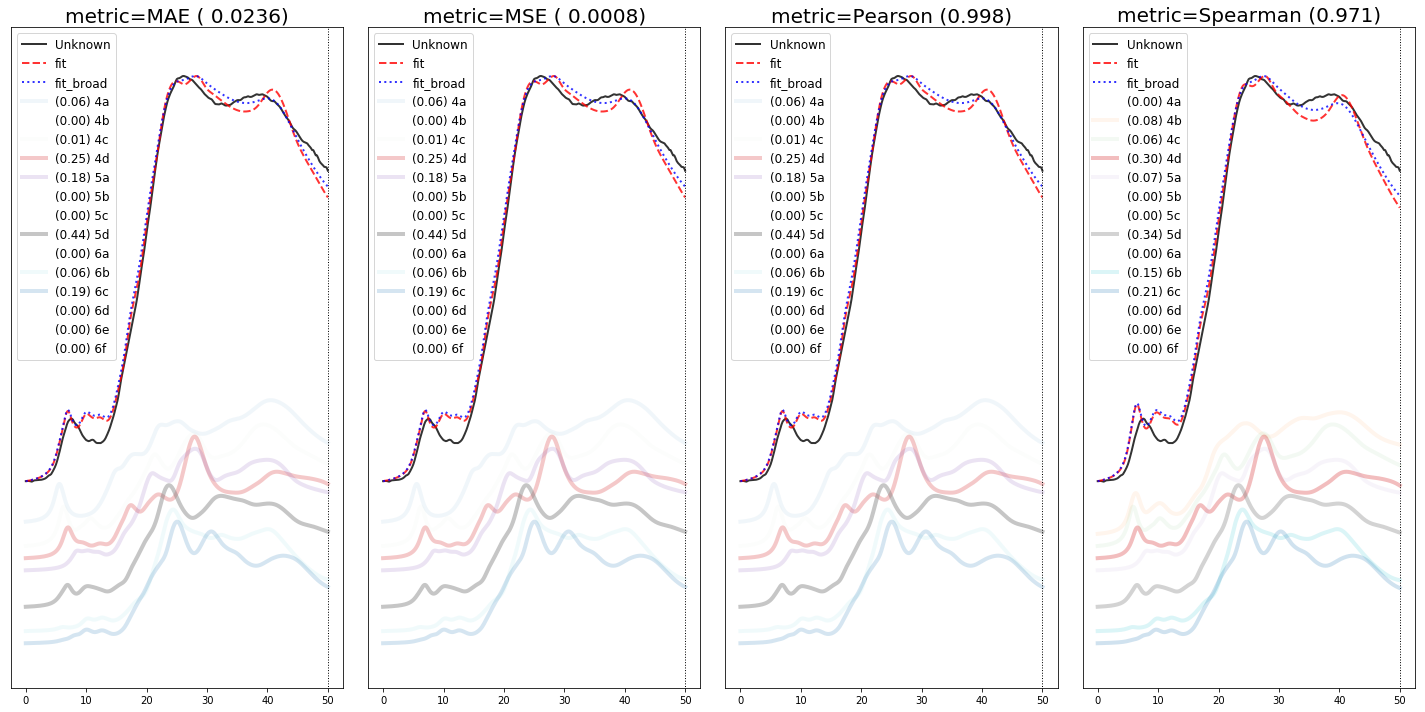

In [13]:
#
U_exp = mXANES(data_loadfrom='unknown.txt',  xanesid='unknown',  Eonset=4961) 
U_exp.transform(irange=[0,emax],x0shift=True,y0shift=True,normalize='max',std=False,xshift=0)

emax=50

prefix='all'
suffix='fixed'
basis_set=[[spectra[0],'4a' ,1,[0,0,1]],
           [spectra[1],'4b' ,1,[0,0,1]],     
           [spectra[2],'4c' ,1,[0,0,1]],
           [spectra[3],'4d' ,1,[0,0,1]],
           [spectra[4],'5a' ,1,[0,0,1]],
           [spectra[5],'5b' ,1,[0,0,1]],
           [spectra[6],'5c' ,1,[0,0,1]],        
           [spectra[7],'5d' ,1,[0,0,1]],
           [spectra[8],'6a' ,1,[0,0,1]],
           [spectra[9],'6b' ,1,[0,0,1]],
           [spectra[10],'6c',1,[0,0,1]],       
           [spectra[11],'6d',1,[0,0,1]],
           [spectra[12],'6e',1,[0,0,1]],        
           [spectra[13],'6f',1,[0,0,1]]]
rshifts = [np.linspace(0.9,1.4,num=6)]
optimizer(U_exp,basis_set,rshifts,emax,prefix,suffix,verbose=True);
plotter(U_exp,emax,prefix,suffix,emax_plt=50)
